In [ ]:
!pip install jax
!pip install jaxlib

In [24]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


import pandas as pd

df = pd.read_csv("./dataset/featureset.csv")
print(df.head)


<bound method NDFrame.head of       Unnamed: 0                                         image_path  \
0              0  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
1              1  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
2              2  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
3              3  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
4              4  L:\DL_Dataset\facescape\fsmview_trainset\10\18...   
...          ...                                                ...   
2609        2609  L:\DL_Dataset\facescape\fsmview_trainset\98\1_...   
2610        2610  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2611        2611  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2612        2612  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2613        2613  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   

           area  eyeblink  
0      0.274263       1.0  
1      0.047657       1.0  
2      0.049305       1.0  
3    

In [25]:
import jax.numpy as jnp

from jax import grad 

x = df.loc[:,"area"].to_numpy().reshape((2614,1)) #从dataframe 转为numpy array
y = df.loc[:,"eyeblink"].to_numpy().reshape((2614,1)) #从dataframe 转为 numpy array

w = jnp.zeros((1,1))
b = 0.0



def forward(w,b,x):

  return jnp.dot(x,w) + b


def jnp_loss_func(w,b,x,y):

  y_hat = forward(w,b,x)

  return jnp.mean(jnp.square(y-y_hat))



def update(w,b,dw,db,lr): #更新参数 

  new_w = w - lr*dw
  new_b = b - lr*db

  return new_w , new_b


grad_w = grad(jnp_loss_func, argnums=0)  #用grad 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理。 argnums= 0 意思是对第1个参数w求梯度
grad_b = grad(jnp_loss_func, argnums=1)  #用grad 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理。 argnums= 1 意思是对第2个参数b求梯度

%timeit grad_w(w,b,x,y)



for i in range(10000):

  loss = jnp_loss_func(w,b,x,y)

  dw = grad_w(w,b,x,y)
  db = grad_b(w,b,x,y)

  w,b = update(w,b,dw,db,lr = 1e-3)



print(w,b)



4.39 ms ± 299 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[[-0.07136972]] 0.9274646


In [26]:
import jax.numpy as jnp

from jax import grad ,jit

x = df.loc[:,"area"].to_numpy().reshape((2614,1)) #从dataframe 转为numpy array
y = df.loc[:,"eyeblink"].to_numpy().reshape((2614,1)) #从dataframe 转为 numpy array

w = jnp.zeros((1,1))
b = 0.0
 

def forward(w,b,x):

  return jnp.dot(x,w) + b


def jnp_loss_func(w,b,x,y): #损失函数写法和pytorch 不一样

  y_hat = forward(w,b,x)

  return jnp.mean(jnp.square(y-y_hat))


def update(w,b,dw,db,lr): #更新参数 

  new_w = w - lr*dw
  new_b = b - lr*db

  return new_w , new_b

#用jit 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理

jit_grad_w = jit(grad(jnp_loss_func, argnums=0))  #用grad 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理。 argnums= 0 意思是对第1个参数w求梯度
jit_grad_b = jit(grad(jnp_loss_func, argnums=1))  #用grad 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理。 argnums= 1 意思是对第2个参数b求梯度

%timeit jit_grad_w(w,b,x,y)

#另一种用法：jit本身可以看成是一个装饰器。
@jit
def jit_grad_w_d(w,b,x,y):

  dw = grad(jnp_loss_func,argnums=0)
  return dw(w,b,x,y)

@jit
def jit_grad_b_d(w,b,x,y):

  db = grad(jnp_loss_func,argnums=1)
  return db(w,b,x,y)

%timeit jit_grad_w(w,b,x,y)

jit_update = jit(update) #用jit 包裹住实际函数，返回一个callable 对象。然后在调用这个callable对象进行处理

for i in range(10000):

  loss = jnp_loss_func(w,b,x,y)

  dw = jit_grad_w(w,b,x,y)
  db = jit_grad_b(w,b,x,y)

  w,b = jit_update(w,b,dw,db,lr = 1e-3)


print(w,b)


15.6 µs ± 957 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.2 µs ± 94.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[-0.07136973]] 0.9274646


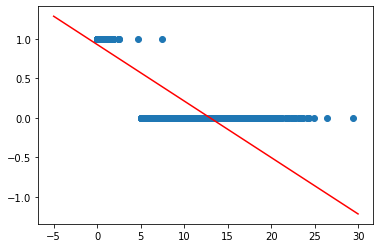

In [4]:
import matplotlib.pyplot as plt

X = df.loc[:,'area'].to_numpy()
Y = df.loc[:,'eyeblink'].to_numpy()

# draw lines

x = jnp.linspace(-5,30, 50)

y = w[0,0]*x + b

plt.figure()

plt.scatter(X,Y)

plt.plot(x,y,color = "red")

plt.show()
